# 지도맵 그리기

# 1) 버블맵 - Scattergeo

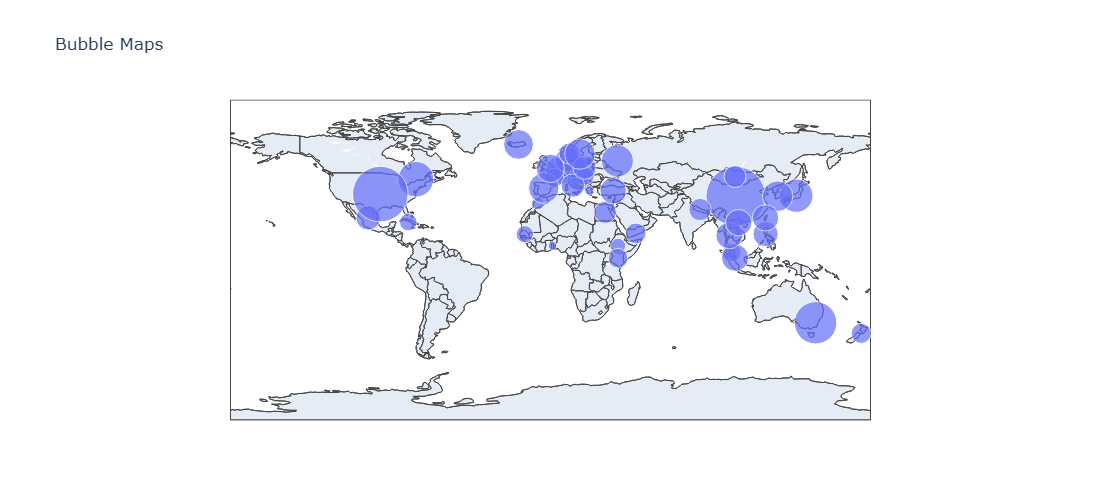

In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv("Data/Data.csv")
# df.info()

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df["year"] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month

# 2020년도 데이터 추출
df_g = df[df['year']==2020].copy()

# 국가별 매출 합계 : 수치 출력 조정 (10만 단위)
df_g1 = df_g[['Country','Revenue']].groupby(by = ['Country'], as_index=False).sum()

# 국가별 고유 좌표값
df_map = df[['Country','Longitude','Latitude','Code3']].drop_duplicates()

# 국가별 매출 데이터와 좌표 결합
df_g2 = df_g1.merge(df_map, on = 'Country', how = 'left')

# 출력 문구 생성
df_g2['text'] = df_g2['Country'] + ' - Total Revenue : ' + \
                round(df_g2['Revenue']/1000000,1).astype(str) + 'M'
trace = go.Scattergeo(lat = df_g2['Latitude'],   # 위도
                      lon = df_g2['Longitude'],  # 경도
                      mode = 'markers',          # 산점도
                      marker = dict(symbol = 'circle',  # 원형
                                    size = np.sqrt(df_g2['Revenue']/10000)), # 원형 크기 조정
                      text = df_g2['text'],      # hover text 활성화
                      hoverinfo = 'text',        # 입력한 text만 활성화
                     )

data = [trace]
layout = go.Layout(title = 'Bubble Maps',
                   geo = dict(scope = 'world',
                              projection_type = 'equirectangular',
                              showcountries = True),
                  width = 500, height = 500)   # 지도 경계선

fig = go.Figure(data, layout)
fig.show()